In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importando CSV de treino
# Importanto CSV de validação do kaggle

df_train = pd.read_csv("../Analise_dados_titanic/train.csv")
df_submission = pd.read_csv("../Analise_dados_titanic/test.csv")


# Analisando os DataSets

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Percebemos que faltam dados das seguintes colunas do DataSet de treino

## Age ========= 714/891
## Cabin ======= 204/891
## Embarked ==== 889/891


# Percebemos que faltam dados das seguintes colunas do DataSet de submissão

## Age ========= 332/418
## Fare ======== 417/418
## Cabin ======= 91/418

# verificando variaveis faltantes

## DataSet de treino

In [5]:
df_train[df_train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


### 177 linhas faltantes

In [6]:
df_train[df_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 2 linhas faltantes

## DataSet de envio

In [7]:
df_submission[df_submission['Age'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 86 linhas faltantes

In [8]:
df_submission[df_submission['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


### 1 linha faltante

## Temos tambem colunas do tipo object (categóricas) nos dois DataSets

    Name    object
    Sex    object
    Ticket    object
    Cabin    object
    Embarked     object

    Primeiro vamos selecionar as colunas que iremos utilizar e transforma-las em colunas numericas

        Decidir tratar as seguintes colunas:
        {
            Sex
            Embarked
        }

    As colunas "Ticket" e "Cabin" possuem muitos dados faltantes, entao vamos descartar essas duas colunas
    A coluna "Name" vamos utilizar outra forma de tratamento
    

In [9]:
# Transformando o "Sex" em binario e criando a nova coluna "Sex_bin"

# poderia ter utilizado o metodo """pd.get_dummies(variable['column'])""" porem utilizei uma lambda para criar uma nova coluna

#df_train['Sex'] = pd.get_dummies(df_train['Sex'])
#df_submission['Sex'] = pd.get_dummies(df_submission['Sex'])

df_train['Sex_bin'] = df_train['Sex'].map(lambda x: 1 if x == 'female' else 0)
df_submission['Sex_bin'] = df_submission['Sex'].map(lambda x: 1 if x == 'female' else 0)

In [10]:
# Transformando os campos "Embarked" em numericos

# embarked_numerico = {'S':1,'C':2,'Q':3}
# df_train['Embarked'] = df_train['Embarked'].map(embarked_numerico)
# df_submission['Embarked'] = df_submission['Embarked'].map(embarked_numerico)

df_train['Embarked_int'] = df_train['Embarked'].map(lambda x: 1 if x == 'S' else 2 if x == 'C' else 3)
df_submission['Embarked_int'] = df_submission['Embarked'].map(lambda x: 1 if x == 'S' else 2 if x == 'C' else 3)

## Para a coluna "Name" avaliamos que todos os nomes possuem algum titulo:
    Ex: Mr., Mrs., Miss., Master.

Então vamos criar uma coluna com os titulos e transformar essa nova coluna em numerica

In [11]:
# Trabalhando com os nomes dos tripulantes
# Criando a coluna "Title"

df_train['Title'] = df_train['Name'].map(lambda x: x.split(',')[1].split()[0])
df_submission['Title'] = df_submission['Name'].map(lambda x: x.split(',')[1].split()[0])

In [12]:
import plotly.express as px

In [13]:
# Avaliando a frenquencia de titulos

fig = px.histogram(y=df_train['Title'])
fig.update_layout(
    title_text=' ', # title of plot
    xaxis_title_text='Count', # xaxis label
    yaxis_title_text='Title', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

In [14]:
# Criando um dicionario com os titulos mais frequentes
# chave = Titulo
# Valor = Numero

# title_int = {'Mr.': 1, 'Miss.': 2, 'Mrs.': 3, 'Master.': 4}

# Transformando a coluna "Title" em numerica
# df_train['Title'] = df_train['Title'].map(title_int).fillna(0)
# df_submission['Title'] = df_submission['Title'].map(title_int).fillna(0)

In [15]:
# Criando um dicionario com os titulos
# chave = Titulo
# Valor = Numero

title_int = {}

for valor, title in enumerate(df_train['Title'].value_counts().keys()):
    title_int[title] = valor+1
    
df_train['Title_int'] = df_train['Title'].map(title_int)
df_submission['Title_int'] = df_submission['Title'].map(title_int).fillna(0)

# Removendo colunas desnecessarias dos DataSets

df_train = df_train.drop(['Cabin','Ticket','PassengerId'], axis=1)
df_submission = df_submission.drop(['Cabin','Ticket','PassengerId'], axis=1)

In [16]:
# Verificando o DataSet

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,Embarked_int,Title,Title_int
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,Mrs.,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss.,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,Mrs.,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Mr.,1


In [17]:
df_submission.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,Embarked_int,Title,Title_int
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,3,Mr.,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1,Mrs.,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,3,Mr.,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,Mr.,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1,Mrs.,3.0


## Certo, agora que temos as colunas como numericas vamos analisar os DataSets para poder preencher as variaveis faltantes

## Visualizando um dashboard completo dos DataSets comparados

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)



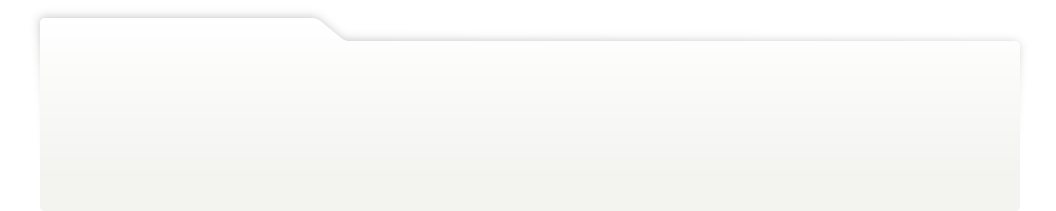
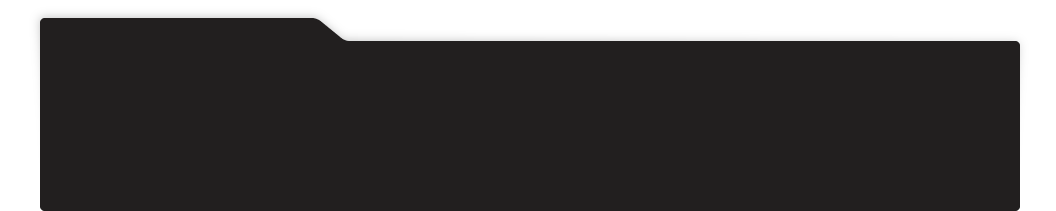
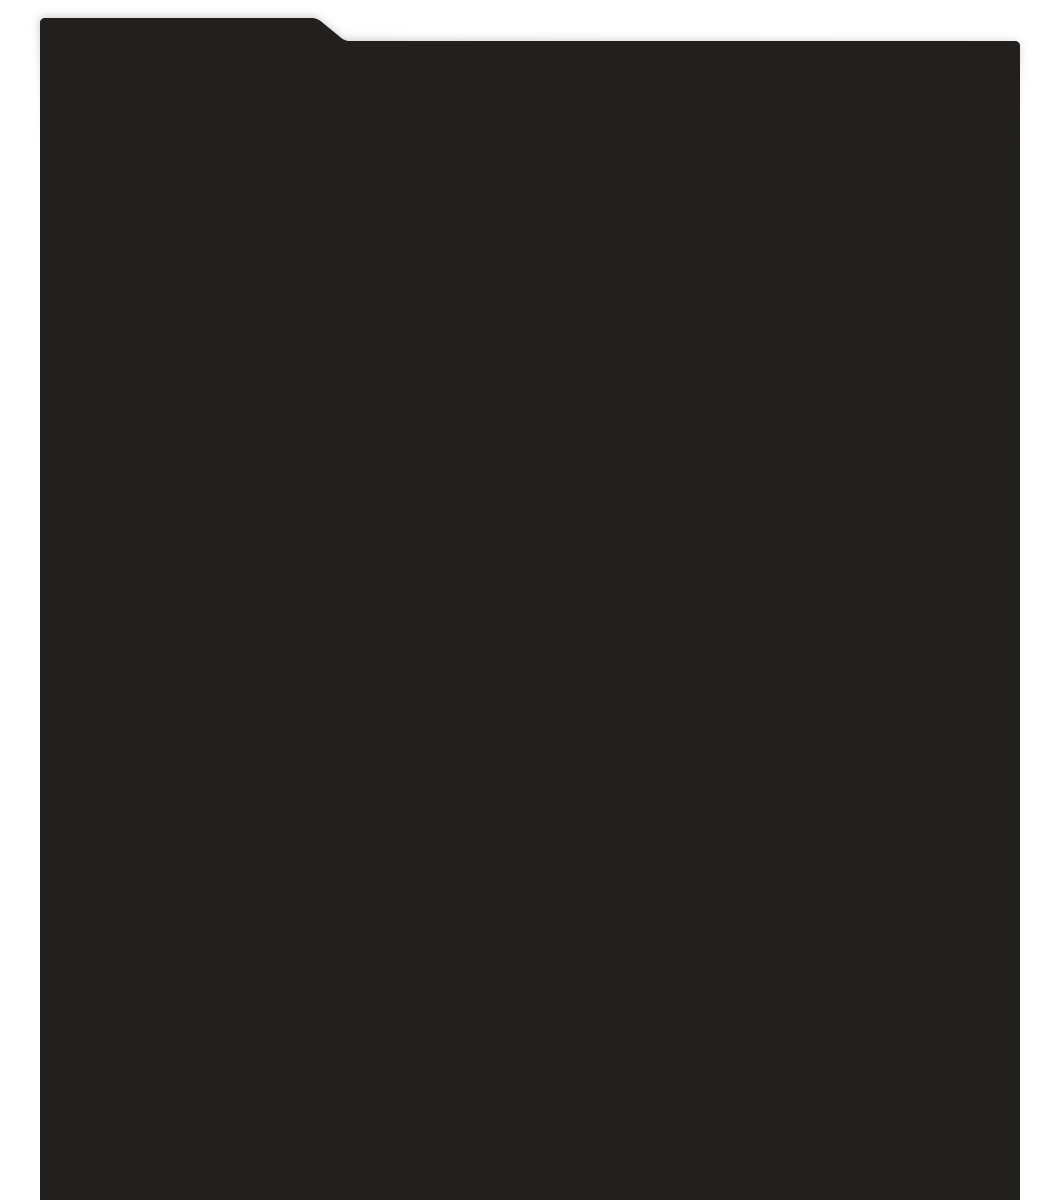
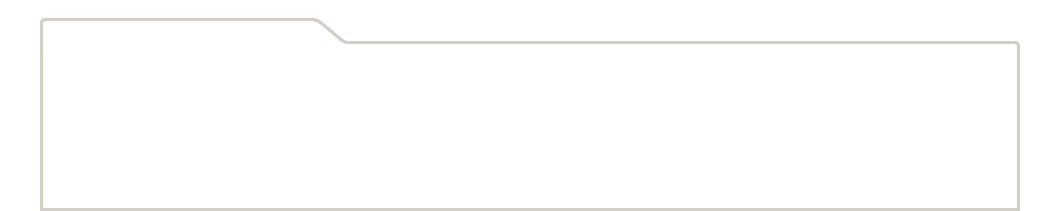
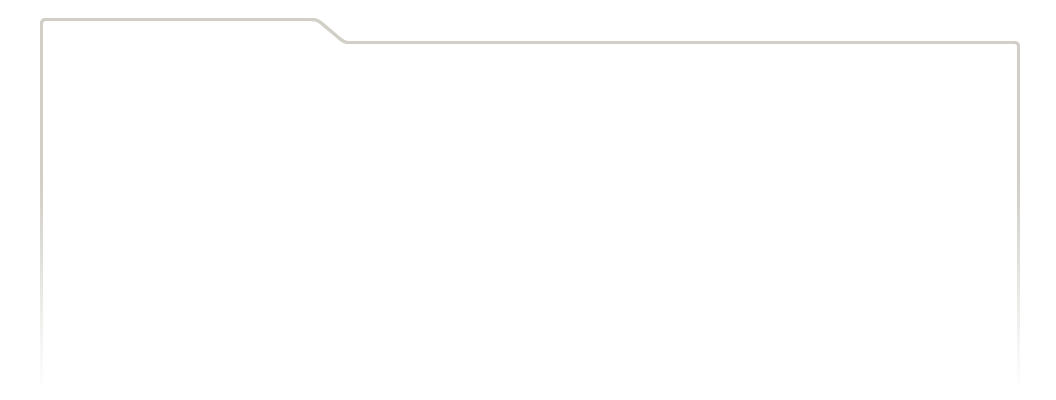
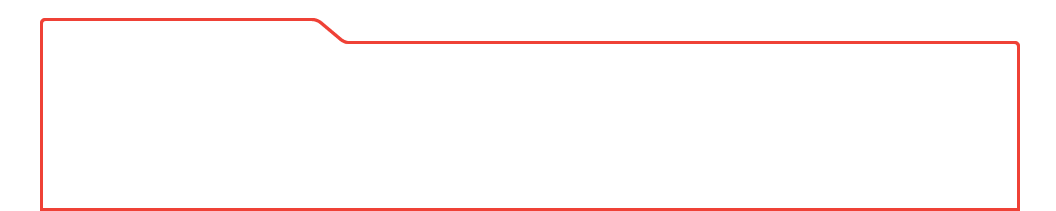
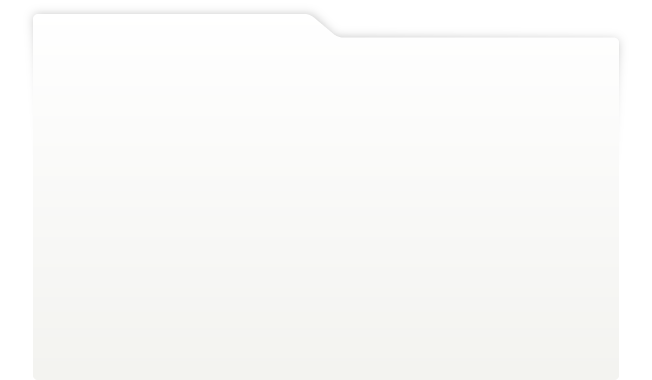
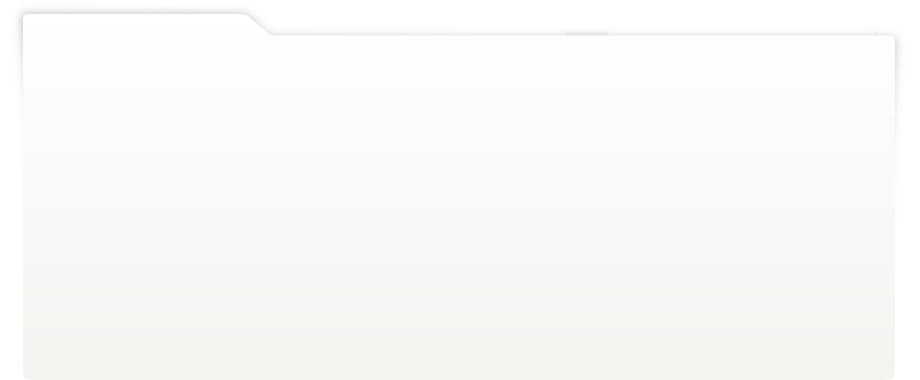
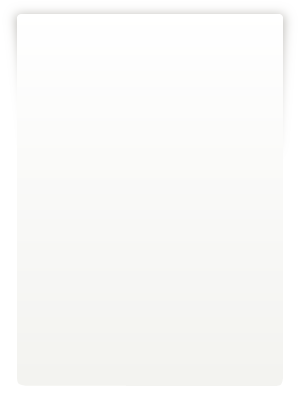
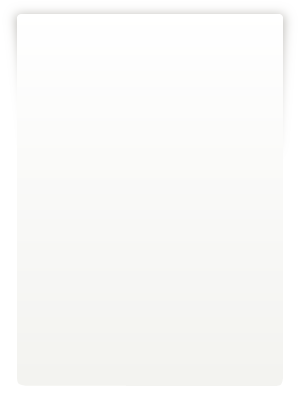
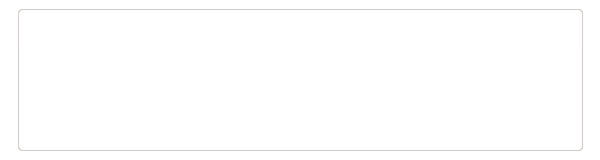
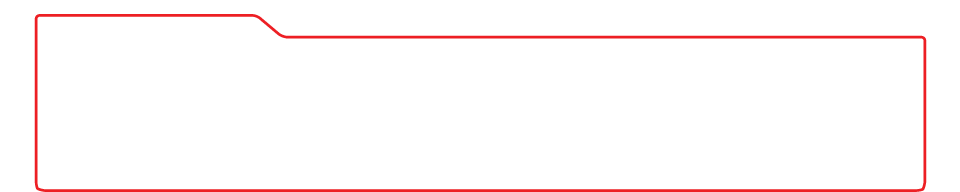
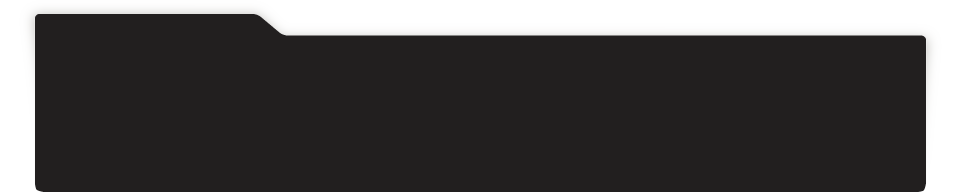
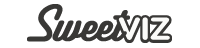
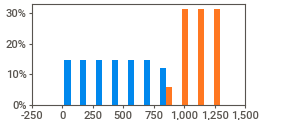
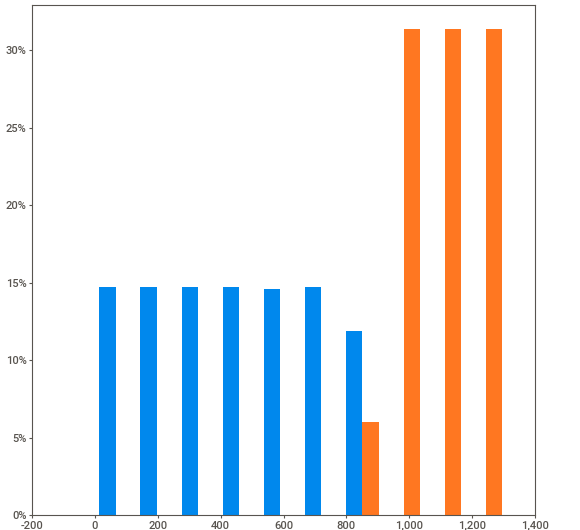
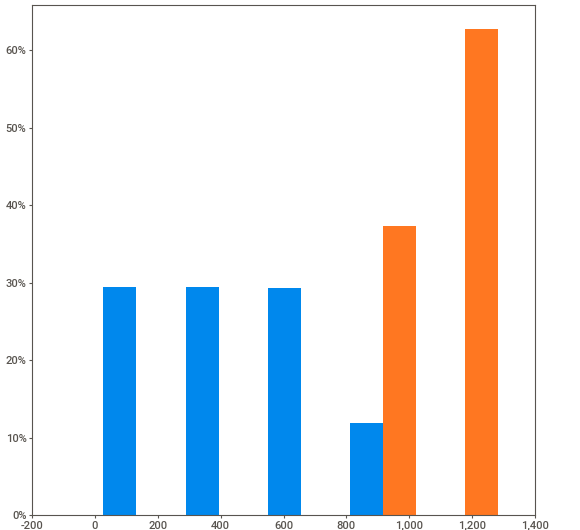
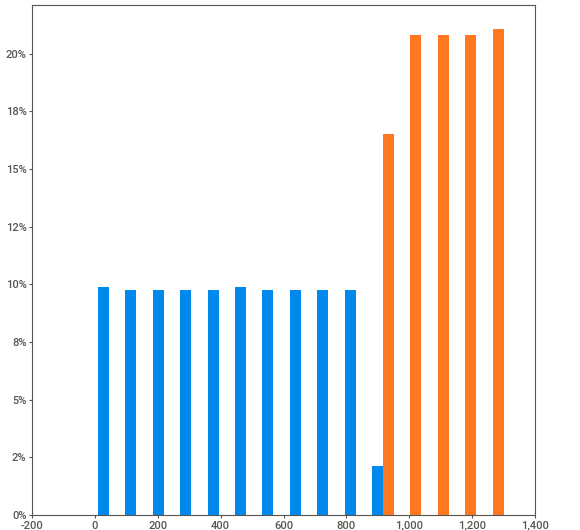
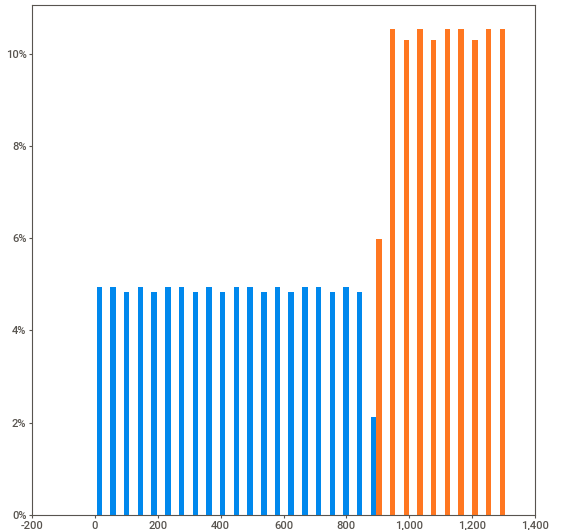
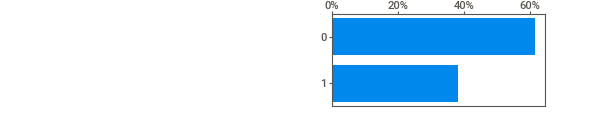
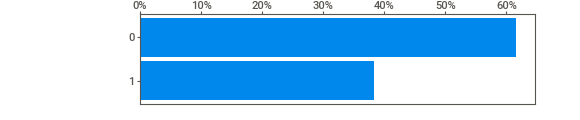
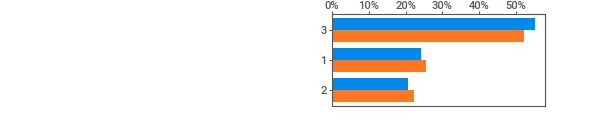
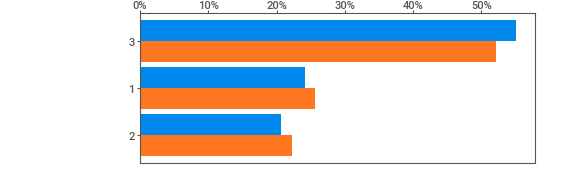
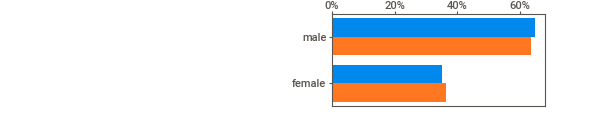
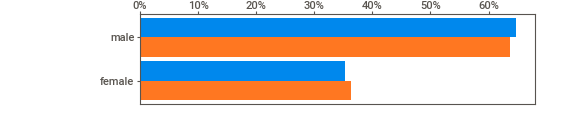
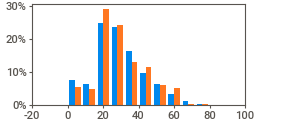
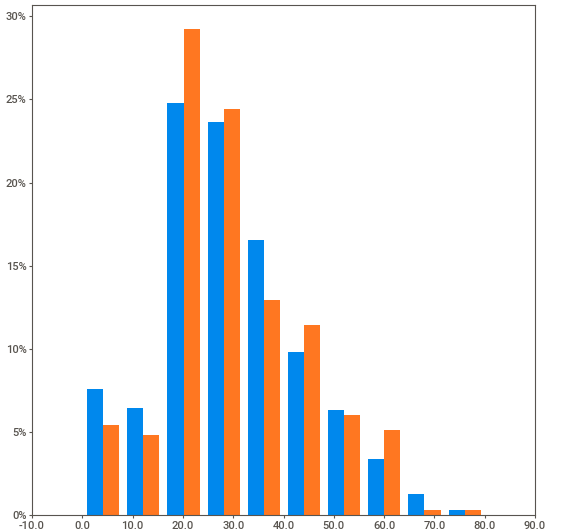
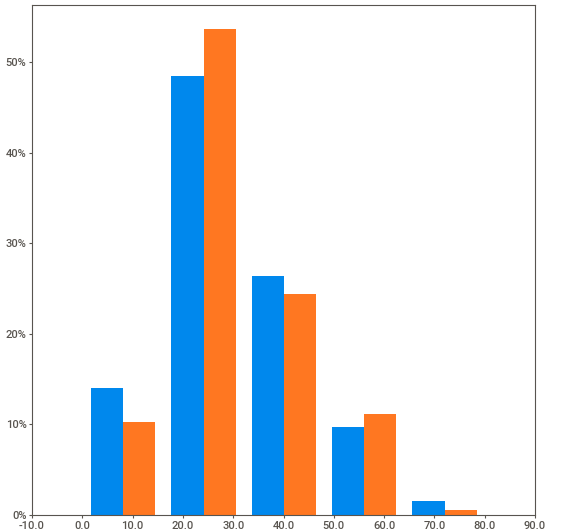
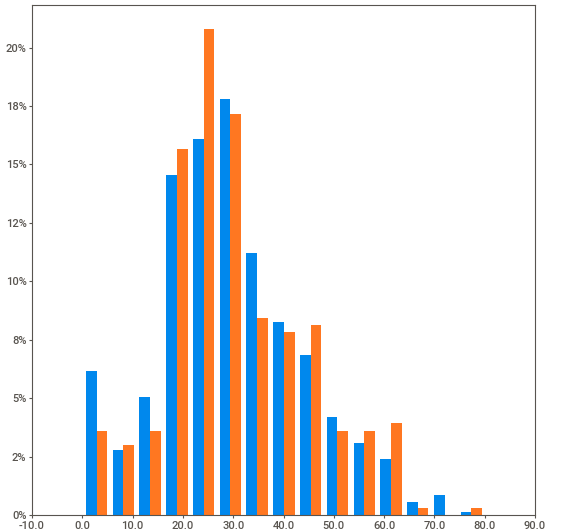
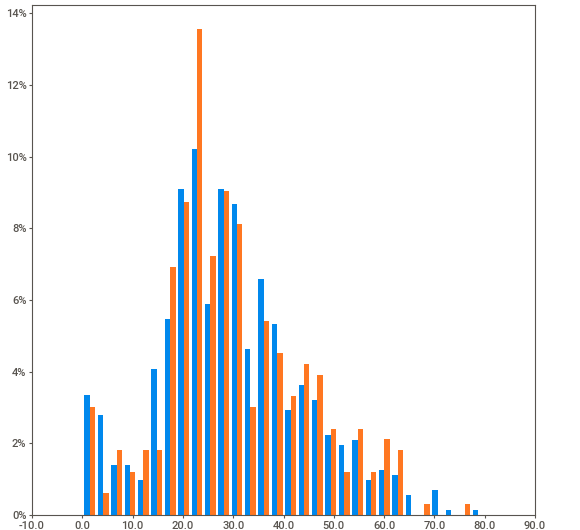
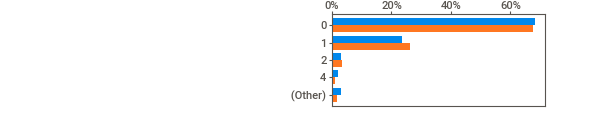
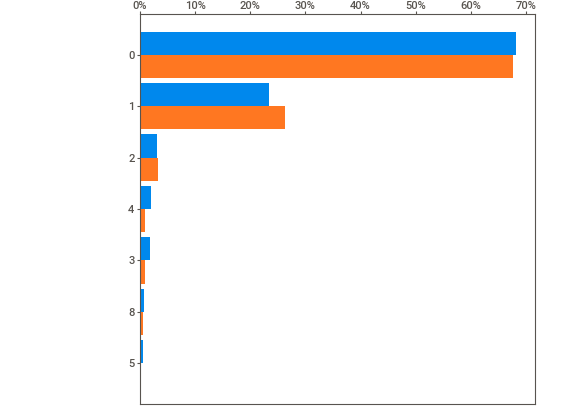
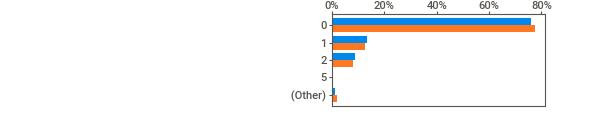
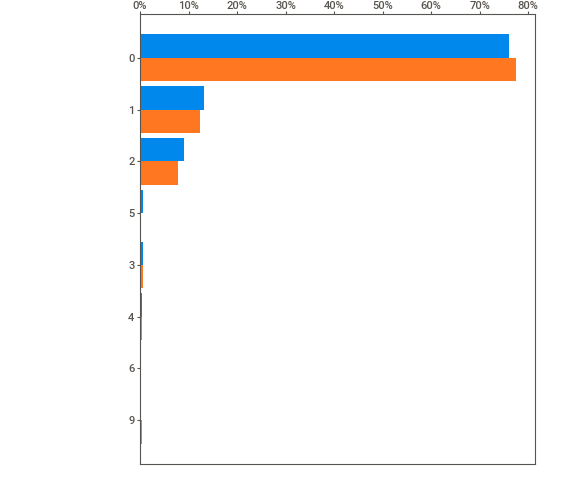
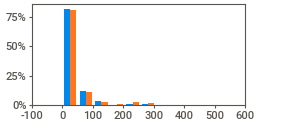
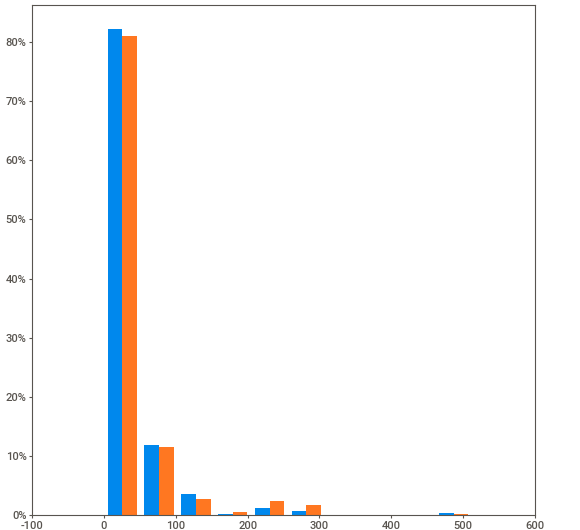
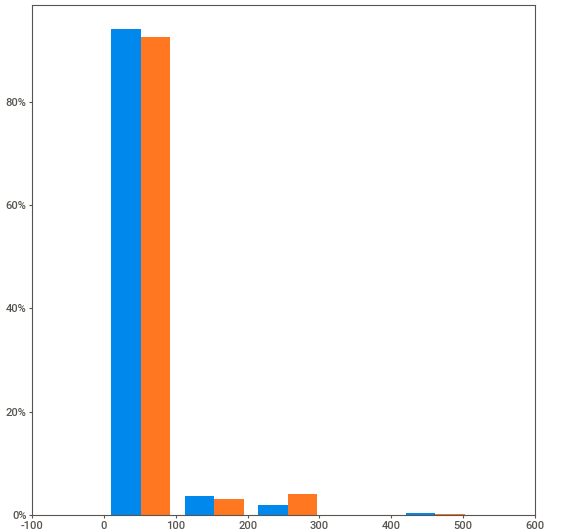
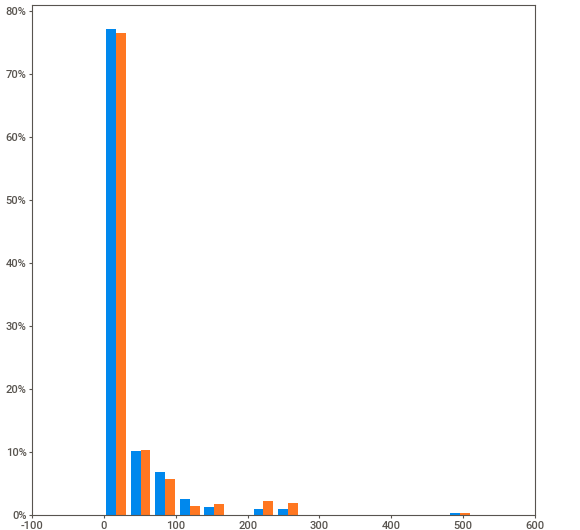
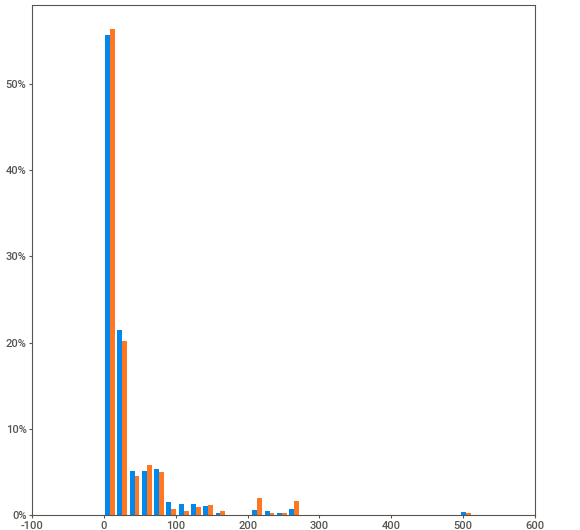
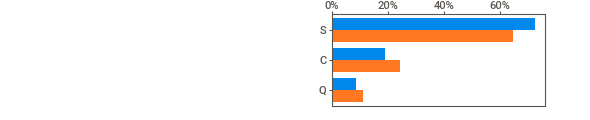
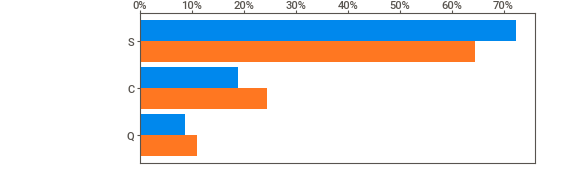
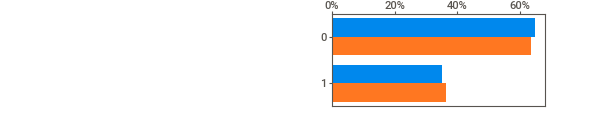
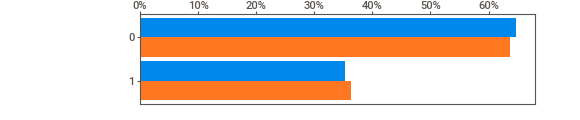
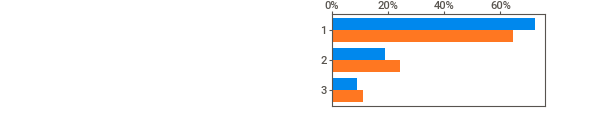
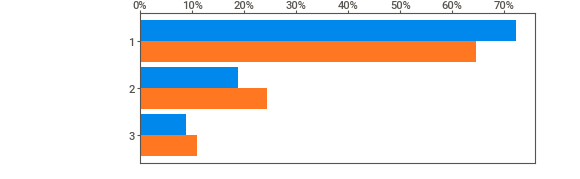
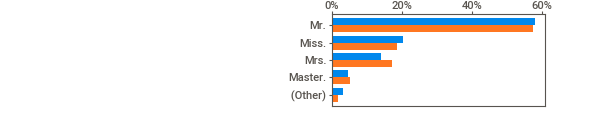
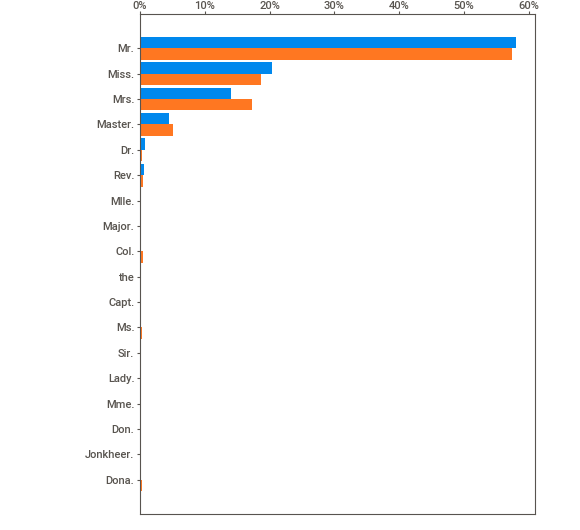
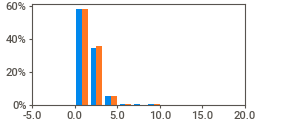
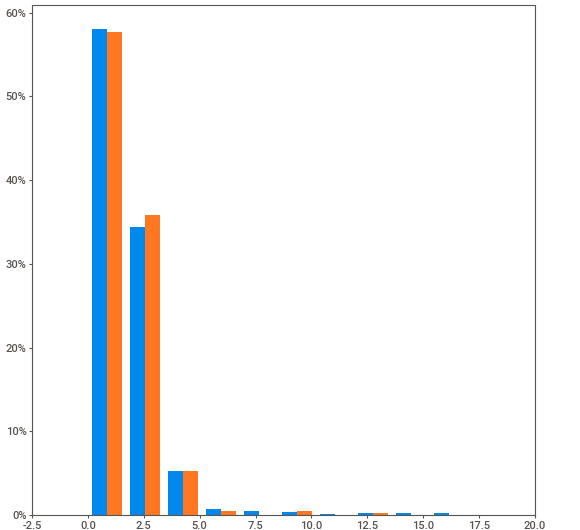
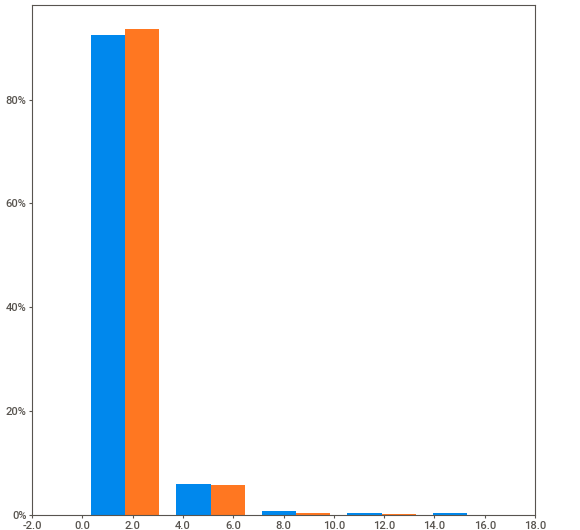
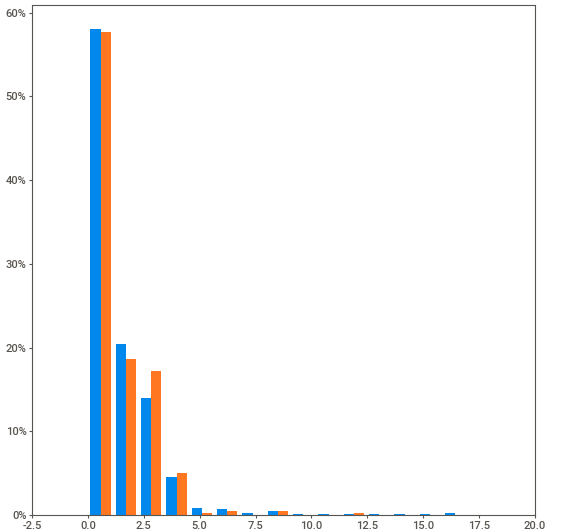
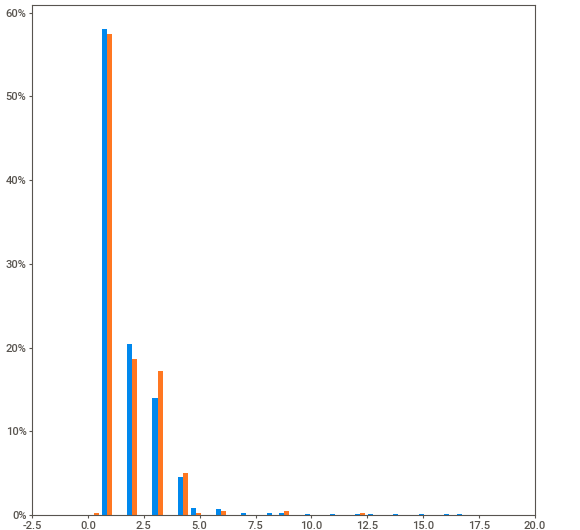
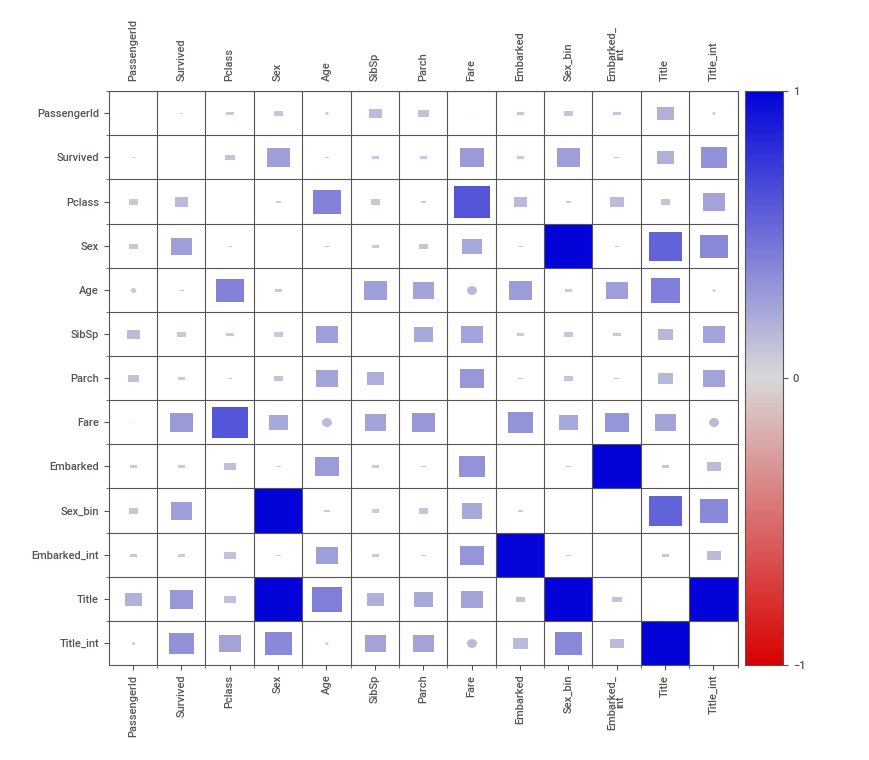
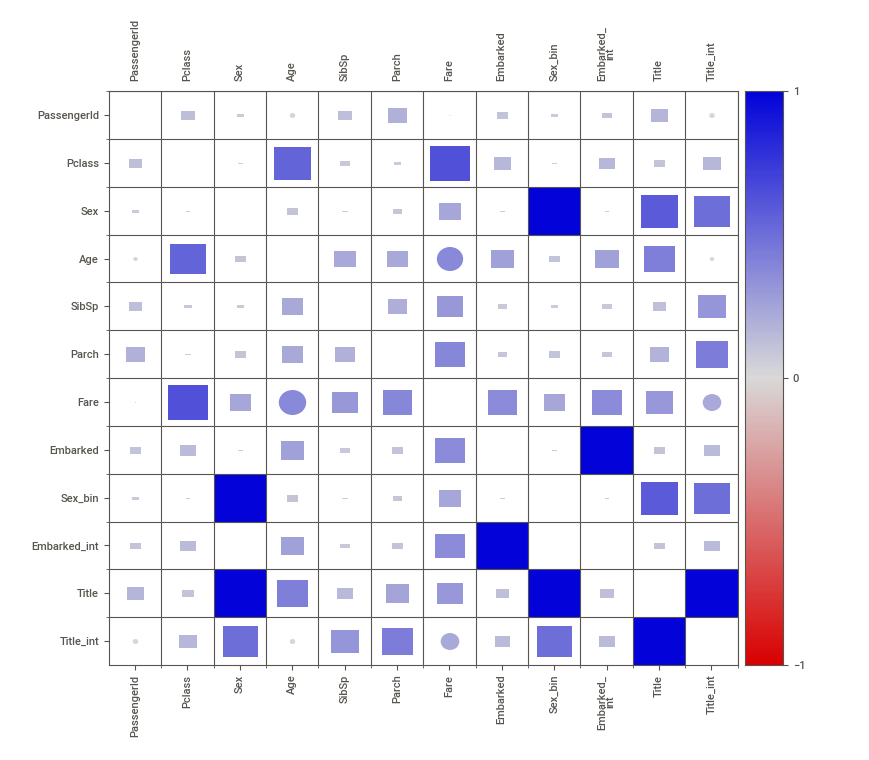

In [18]:
import sweetviz as sv

sv.config_parser.read("sweetviz_myconfig.ini")

report = sv.compare([df_train,'DataSet Treino'], [df_submission, 'DataSet Estimativas'])
report.show_notebook()

## Focando na analise das correlações para preenchimento dos dados faltantes concluimos:

### Preenchendo os embarques faltantes no DataSet de treino

    Percebemos que a coluna "Embarked" possui uma correlação mais destacada com as colunas:
    {
        Age
        Fare
    }

    Como ja verificamos nas celulas acima, as linhas com os dados faltantes possuem os seguintes dados:

    Age    Fare
    38     80
    62     80

In [19]:
fig1 = px.histogram(df_train.loc[df_train['Fare'] >= 80, 'Embarked'], title="Passagens de 80 acima")
fig2 = px.histogram(df_train.loc[df_train['Age'] == 38, 'Embarked'], title="Embarques de pessoas com idade igual a 38 anos")
fig3 = px.histogram(df_train.loc[df_train['Age'] == 62, 'Embarked'], title="Embarques de pessoas com idade igual a 62 anos")
fig1.show()
fig2.show()
fig3.show()

## Conclusões:
    Passagens com valor de 80 acima: Embarques Porto 2 > Porto 1 > Porto 3
    Idades igual a 38 anos: Embarques Porto 1 > Porto 2
    Idades igual a 32 anos: Embarques Porto 1

Vamos então preencher os faltantes com o valor 1

In [20]:
# A escolha do "1" foi devido a relação entre Embarque e valor do Ticket e idade

df_train['Embarked_int'] = df_train['Embarked_int'].fillna(1)

### Preenchendo os valores de "Fare faltantes no DataSet de envio

    Percebemos que a coluna "Fare" possui uma forte correlação com a coluna "Pclass" e tambem possui alguma correlação com "Embarked":
    {
        Pclass
        Embarked
    }

    Como ja verificamos nas celulas acima, as linhas com os dados faltantes possuem os seguintes dados:

    Pclass    Embarked
    3         1

In [21]:
fig = px.box(df_submission.loc[df_submission['Pclass'] == 3, 'Fare'], color=df_submission.loc[df_submission['Pclass'] == 3, 'Embarked'], title="Valor pago nas passgens")
fig.show()

## Conclusões:
    Passageiros de classe 3 que embarcaram no Porto 0 tiveram em média 8.05 de valor na coluna "Fare"

Vamos então preencher os faltantes com o valor 8

In [22]:
# A escolha do valor foi devido a relação entre onde embarcaram e classe

df_submission['Fare'] = df_submission['Fare'].fillna(8)

## Agora vamos preencher as idades de ambos os DataSets

# Criterio de preenchimento

## DataSet de Treino

    Para os que sobreviveram, a media de idade dos que sobreviveram;
        Para o sexo masculino: a média de idade do sexo masculino
        Para o sexo feminino: a média de idade do sexo feminino

    Para os que não sobreviveram, a media de idade dos que não sobreviveram
        Para o sexo masculino: a média de idade do sexo masculino
        Para o sexo feminino: a média de idade do sexo feminino

In [23]:
# Obtendo as médias

alive_female_mean = int(df_train.loc[df_train['Survived'] == 1].loc[df_train['Sex'] == 'female','Age'].mean())
alive_male_mean = int(df_train.loc[df_train['Survived'] == 1].loc[df_train['Sex'] == 'male','Age'].mean())

dead_female_mean = int(df_train.loc[df_train['Survived'] == 0].loc[df_train['Sex'] == 'female','Age'].mean())
dead_male_mean = int(df_train.loc[df_train['Survived'] == 0].loc[df_train['Sex'] == 'male','Age'].mean())

# Preenchendo

df_train.loc[((df_train['Survived'] == 1) & (df_train['Sex'] == 'female')), 'Age'] = df_train.loc[((df_train['Survived'] == 1) & (df_train['Sex'] == 'female')), 'Age'].fillna(alive_female_mean)

df_train.loc[((df_train['Survived'] == 1) & (df_train['Sex'] == 'male')), 'Age'] = df_train.loc[((df_train['Survived'] == 1) & (df_train['Sex'] == 'male')), 'Age'].fillna(alive_male_mean)


df_train.loc[((df_train['Survived'] == 0) & (df_train['Sex'] == 'female')), 'Age'] = df_train.loc[((df_train['Survived'] == 0) & (df_train['Sex'] == 'female')), 'Age'].fillna(dead_female_mean)

df_train.loc[((df_train['Survived'] == 0) & (df_train['Sex'] == 'male')), 'Age'] = df_train.loc[((df_train['Survived'] == 0) & (df_train['Sex'] == 'male')), 'Age'].fillna(dead_female_mean)

# Criterio de preenchimento

## DataSet de submissao
    A media de idade geral para os faltantes

In [24]:
# Obtendo as médias

mean_age_male_df_train = int(df_train.loc[df_train['Sex'] == 'male', 'Age'].mean())
mean_age_female_df_train = int(df_train.loc[df_train['Sex'] == 'female', 'Age'].mean())

# Preenchendo

df_submission.loc[df_submission['Sex'] == 'male', 'Age'] = df_submission.loc[df_submission['Sex'] == 'male', 'Age'].fillna(mean_age_male_df_train)

df_submission.loc[df_submission['Sex'] == 'female', 'Age'] = df_submission.loc[df_submission['Sex'] == 'female', 'Age'].fillna(mean_age_female_df_train)

In [25]:
# Transformando as colunas "SibSp" e "Parch" em apenas uma coluna
# Definindo uma coluna como tamanho da familia "Family_size"

df_train['Family_size'] = df_train['SibSp'] + df_train['Parch']
df_submission['Family_size'] = df_submission['SibSp'] + df_submission['Parch']

# Confirmando a situação de cada DataSet após atualizações

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,Embarked_int,Title,Title_int,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,Mr.,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,Mrs.,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss.,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,Mrs.,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Mr.,1,0


In [27]:
df_submission.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,Embarked_int,Title,Title_int,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,3,Mr.,1.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1,Mrs.,3.0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,3,Mr.,1.0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,Mr.,1.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1,Mrs.,3.0,2


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Sex_bin       891 non-null    int64  
 13  Embarked_int  891 non-null    int64  
 14  Title         891 non-null    object 
 15  Title_int     891 non-null    int64  
 16  Family_size   891 non-null    int64  
dtypes: float64(2), int64(9), object(6)
memory usage: 118.5+ KB


In [29]:
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Sex           418 non-null    object 
 4   Age           418 non-null    float64
 5   SibSp         418 non-null    int64  
 6   Parch         418 non-null    int64  
 7   Ticket        418 non-null    object 
 8   Fare          418 non-null    float64
 9   Cabin         91 non-null     object 
 10  Embarked      418 non-null    object 
 11  Sex_bin       418 non-null    int64  
 12  Embarked_int  418 non-null    int64  
 13  Title         418 non-null    object 
 14  Title_int     418 non-null    float64
 15  Family_size   418 non-null    int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 52.4+ KB


# BALANCEANDO O DATASET

In [30]:
from imblearn.over_sampling import ADASYN

## Vamos utilizar a tecnica de OverSampling pois temos poucos dados para treino.

>Para saber mais visite: [OverSampling](link>https://universidadedoaudio.com/blog/o-que-e-oversampling/</link)

In [60]:
# colunas = ['Pclass','Age','SibSp','Parch','Fare','Sex_bin','Embarked_int','Title_int','Family_size']
colunas = ['Pclass','Fare','Sex_bin','Title_int','Parch']
X = df_train[colunas]
y = df_train['Survived']

In [61]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_bin,Embarked_int,Title_int,Family_size
0,3,22.0,1,0,7.2500,0,1,1,1
1,1,38.0,1,0,71.2833,1,2,3,1
2,3,26.0,0,0,7.9250,1,1,2,0
3,1,35.0,1,0,53.1000,1,1,3,1
4,3,35.0,0,0,8.0500,0,1,1,0


In [62]:
# Utilizamos o parametro "sampling_strategy" como valor 0.85

# sampling_strategy:
# Quando float, corresponde à razão desejada do número de amostras na classe minoritária sobre o número de
# amostras na classe majoritária após a reamostragem.

ov_ada = ADASYN(sampling_strategy=0.8)

In [63]:
# Aplicando o OverSampling

X, y = ov_ada.fit_resample(X,y)

In [64]:
# Visualizando a distribuição das classes após o balanceamento

px.histogram(y, color=y).show()
px.histogram(df_train['Survived']).show()

# Exportando DataSets para criação do modelo e estimativa

In [59]:
X.to_csv("X_desbalanced_OverSampling.csv", index=False)
y.to_csv("df_train_Targets.csv", index=False)
df_submission.to_csv("df_submission_final.csv", index=False)

# Passamos para o notebook de estimativas